<a href="https://colab.research.google.com/github/theirfanrahman/Customer_Segmentation_KMeans_-_PCA/blob/master/Customer_Segmentation_KMeans_%26_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combine K-Means with PCA

# In this section we are going to segment/cluster the customer best on their given details

In [28]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [29]:
# import data
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CustomerSegementation/segmentationdata.csv")

In [30]:
# let's have a look top 5 records
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


As we can see ID column has no use as this is a unique idetifier for each customer. So, down the line we will remove this column.
Let's discuss other column details:

*   Sex { 0: Male, 1: Femaile }
*   Marital Status { 0: Unmarried/Single , 1: Married/Not Single }
*   Education { 0: Other/Unknown, 1: High-School, 2: Univeristy, 3: Graduate School }
*   Income { Annual Income of individual in dollars }
*   Occupation { 0: Unemployeed, 1: Skilled, 2: Highly qualified }
*   Settlement Size { 0: Small City, 1: Mid-size city, 2: ig-size city }





# **Explore Data**

In [31]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [32]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


As we can see we have exactly 2000 record in each field/column.

If you see Age and Income field is continuos variable and mean value is 35.9 and 120954 respectively. And for other filed it doesn't make sence as they categorical variable

Also if you notice the column Age and Income have vast diffrence the range of these values. So we have to incorporate an important analysis i.e. standardize our data.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


It's good to see that we don't have any null values in any filed/column

let's remove ID field/column

In [34]:
df = df.drop(['ID'], axis=1)

# **Correlation Estimation**

In [35]:
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


As we know Correlation defines the liner dependency between variables and values lies between -1 to 1 which means:

*   -1 represent strong netive correlation
*   0 represent no correlation
*   1 represent stron positive correlation

##### if you see here closely the diagonal correlation values represent the correlation between the variable it self and thus the correlation value is 1.
---
##### Age and Education has good correlation among themself which means those who has more age they are more educated.
---
##### Income and Occupation has good correlation among themself which means those who has good occupation has good income and it makse also.








# **Let's Visualize**

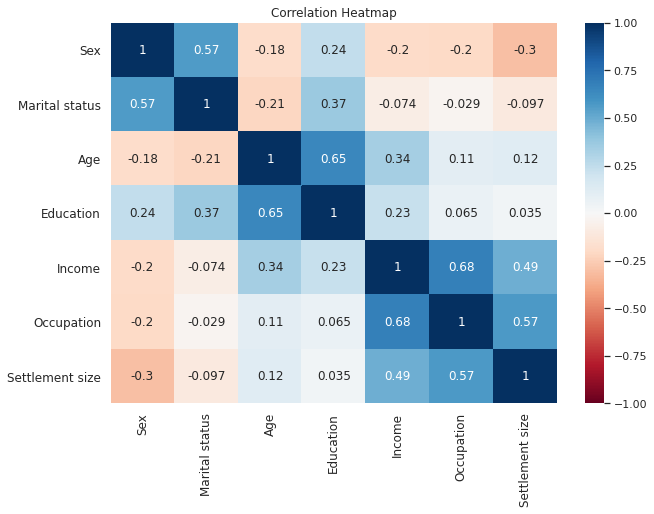

In [36]:
plt.figure(figsize=(10,7))
s = sns.heatmap(df.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title("Correlation Heatmap")
plt.show()

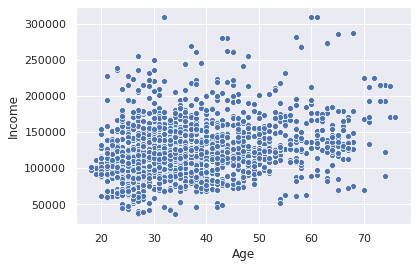

In [37]:
sns.scatterplot(df['Age'], df['Income'])
plt.show()

#Standardization

In [38]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df) 

In [39]:
df_std[0:2]

array([[-0.91739884, -0.99302433,  2.65361447,  1.60432297,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, -0.06337243,  0.78265438,
         0.29682303,  1.552326  ]])

# Hierarchical Clustering

In [40]:
heir_clust = linkage(df_std, method='ward')

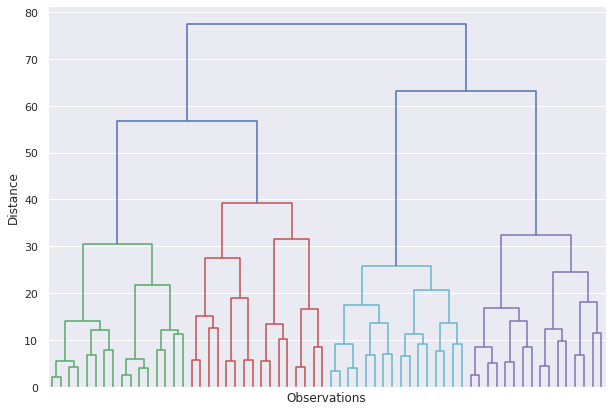

In [41]:
plt.figure(figsize=(10,7))
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(heir_clust,
           p=5,
           truncate_mode='level',
           show_leaf_counts=False,
           no_labels=True)
plt.show()

## K-Means Clustering

####WSS Plot or Elbow Curve for Optimal cluster identification

In [42]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

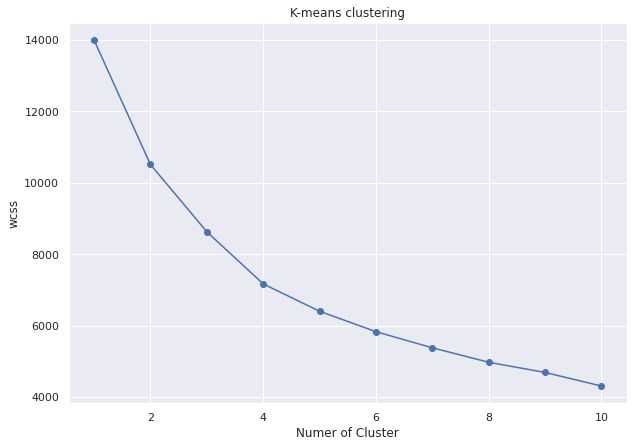

In [43]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11), wcss, marker='o', linestyle='-')
plt.xlabel("Numer of Cluster")
plt.ylabel("wcss")
plt.title("K-means clustering")
plt.show()

In [44]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

#### Result

In [45]:
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment k-means'] = kmeans.labels_

In [46]:
df_segment_analysis = df_segm_kmeans.groupby(['Segment k-means']).mean()
df_segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment k-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [47]:
df_segment_analysis['N obs'] = df_segm_kmeans[['Segment k-means','Sex']].groupby(['Segment k-means']).count()

In [48]:
df_segment_analysis['Prop Obs'] = df_segment_analysis['N obs']/df_segment_analysis['N obs'].sum()

In [49]:
df_segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N obs,Prop Obs
Segment k-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [50]:
df_segment_analysis.rename({0: 'well-off',
                            1:'fewer-opportinities',
                            2:'standard',
                            3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N obs,Prop Obs
Segment k-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportinities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
career focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [51]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment k-means'].map({0: 'well-off',
                                                                  1:'fewer-opportinities',
                                                                  2:'standard',
                                                                  3:'career focused'}) 

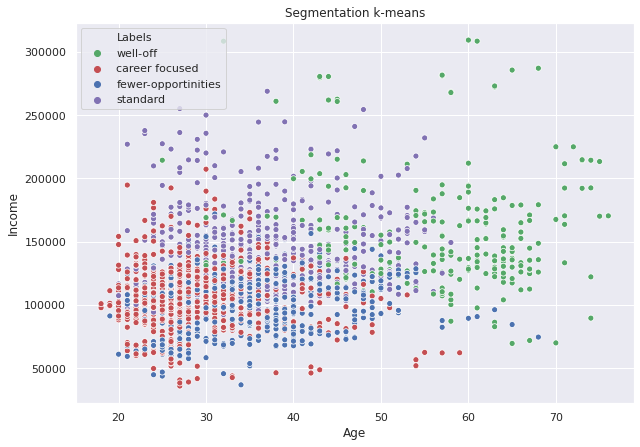

In [52]:
plt.figure(figsize=(10,7))
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
sns.scatterplot(x_axis, y_axis, hue=df_segm_kmeans['Labels'], palette=['g','r','b','m'])
plt.title("Segmentation k-means")
plt.show()

As we can see only green cluster i.e. well-off cluster is visually seperated from other cluster but other clusters are jumbled all together. 

## PCA

In [54]:
pca = PCA()

In [55]:
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [56]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

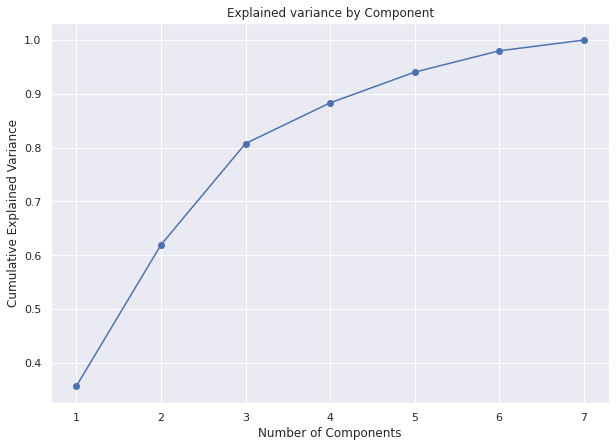

In [57]:
plt.figure(figsize=(10,7))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.title('Explained variance by Component')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [58]:
pca = PCA(n_components=3)

In [59]:
pca.fit(df_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

# PCA Results

In [60]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [61]:
df_pca_comp = pd.DataFrame(data= pca.components_,
                           columns=df.columns.values,
                           index=['Comp1','Comp2','Comp3'])

In [62]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Comp1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Comp2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Comp3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


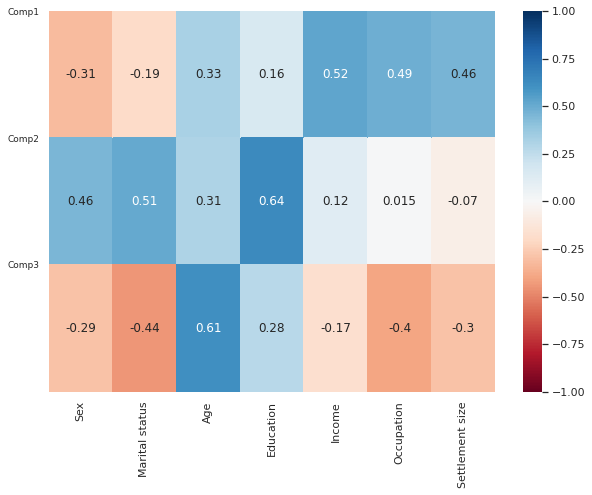

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(df_pca_comp,
            annot=True,
            cmap='RdBu',
            vmin=-1,
            vmax=1)
plt.yticks([0,1,2],
           ['Comp1','Comp2','Comp3'],
           rotation=0,
           fontsize=9)
plt.show()

In [64]:
pca.transform(df_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [65]:
scores_pca = pca.transform(df_std)

# K-means clustering with PCA

In [66]:
wcss = []
for i in range(1,11):
  kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

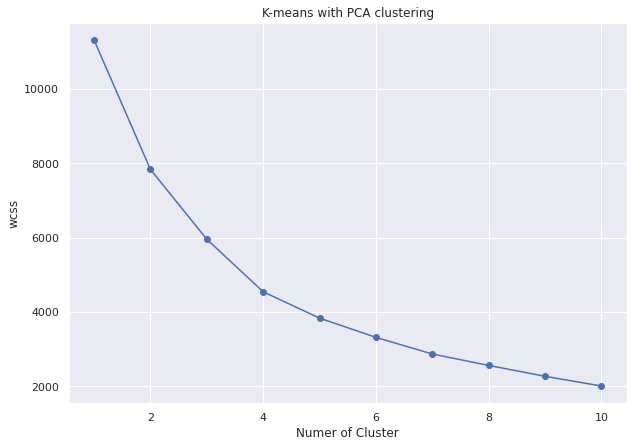

In [67]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11), wcss, marker='o', linestyle='-')
plt.xlabel("Numer of Cluster")
plt.ylabel("wcss")
plt.title("K-means with PCA clustering")
plt.show()

In [68]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)

In [69]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

# K-means clustering with PCA results

In [70]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ['Comp1','Comp2','Comp3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [71]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Comp1,Comp2,Comp3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3


In [72]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Comp1,Comp2,Comp3
Segment K-means PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [73]:
df_segm_pca_kmeans_freq['N obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N obs']/df_segm_pca_kmeans_freq['N obs'].sum()

In [74]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0: 'well-off',
                                                          1:'fewer-opportinities',
                                                          2:'standard',
                                                          3:'career focused'}) 
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Comp1,Comp2,Comp3,N obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
well-off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
fewer-opportinities,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
standard,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [75]:
df_segm_pca_kmeans['Labels'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'well-off',
                                                                              1:'fewer-opportinities',
                                                                              2:'standard',
                                                                              3:'career focused'})

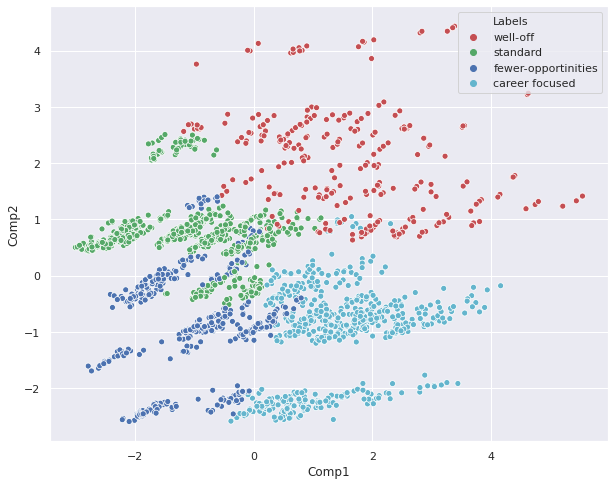

In [76]:
plt.figure(figsize=(10,8))
x_axis = df_segm_pca_kmeans['Comp1']
y_axis = df_segm_pca_kmeans['Comp2']
sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['Labels'], palette=['r','g','b','c'])

We can now observe the separate clusters. That was one of the biggest goals of PCA – to reduce the number of variables by combining them into bigger, more meaningful features.

Not only that, but they are ‘orthogonal’ to each other. This means that the difference between components is as big as possible.

There is some overlap between the green and blue segments. But, as a whole, all four segments are clearly separated.